In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from env.env_gym import GuestEnv

In [2]:
def run_env(env, actions, steps=500, seed=42):
    obs, info = env.reset(seed=seed)
    phonemes, rewards = [], []
    for i in range(steps):
        act = actions[i] if i < len(actions) else actions[-1]
        obs, reward, terminated, truncated, info = env.step(act)
        phonemes.append(info['phoneme'].copy())
        rewards.append(reward)
        if terminated or truncated:
            break
    return np.array(phonemes), np.array(rewards)

def plot_results(phonemes, rewards, title):
    steps = np.arange(len(rewards))
    plt.figure(figsize=(9,4))
    for a in range(phonemes.shape[1]):
        plt.plot(steps, phonemes[:, a], label=f'Agent {a}')
    plt.xlabel('Step'); plt.ylabel('Phonemes'); plt.title(title + ' - Phonemes')
    plt.legend(); plt.grid(True); plt.show()
    plt.figure(figsize=(9,4))
    plt.plot(steps, rewards, label='Reward')
    plt.xlabel('Step'); plt.ylabel('Reward'); plt.title(title + ' - Reward')
    plt.grid(True); plt.show()

# Baseline

In [3]:
# Create environment
env = GuestEnv(max_steps=100, reward_shaping=False)  # Shorter episodes for more frequent logging
actions = [0]*100
p, r = run_env(env, actions)

2025-12-03 00:10:34 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


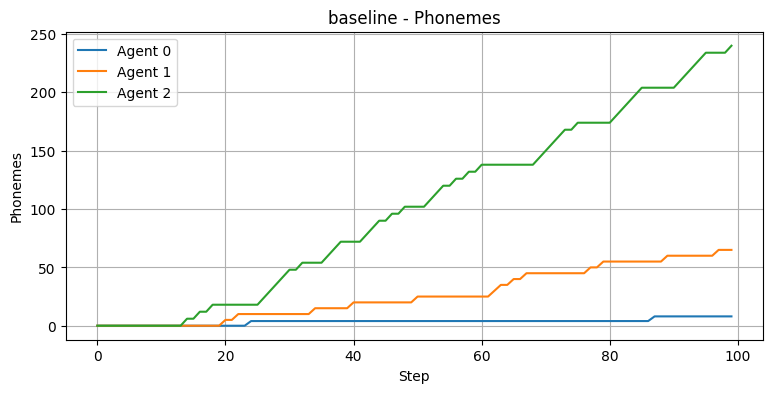

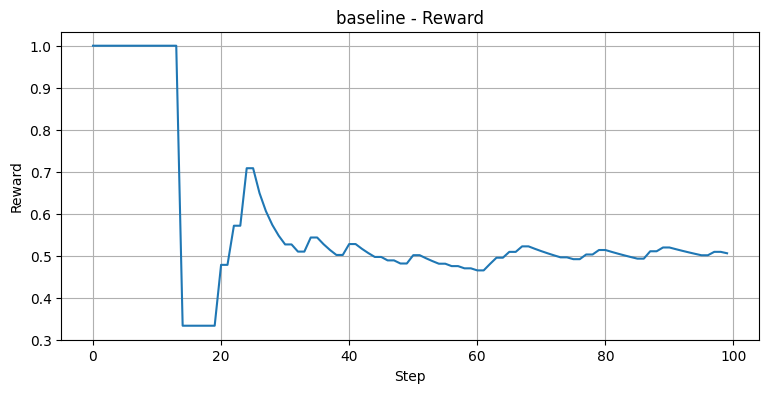

In [4]:
plot_results(p, r, 'baseline')

In [ ]:
# Create environment
env_test = GuestEnv(max_steps=100, reward_shaping=False)  # Shorter episodes for more frequent logging

env_test.agent_params[0].update({  # quiet analyst
    "min_energy_to_speak": 0.0,
    "energy_gain": 0.0,
    "energy_decay": 0.001,
    "max_speaking_time": 5,
    "phonemes_per_step": 3,
    })

env_test.agent_params[1].update({  # balanced mediator
        "min_energy_to_speak": 0.0,
        "energy_gain": 0.0,
        "energy_decay": 0.002,
        "max_speaking_time": 5,
        "phonemes_per_step": 3,
    })

env_test.agent_params[2].update({  # energetic storyteller
        "min_energy_to_speak": 0.0,
        "energy_gain": 0.0,
        "energy_decay": 0.003,
        "max_speaking_time": 5,
        "phonemes_per_step": 3,
    })

actions = [0]*100
p, r = run_env(env_test, actions)

2025-12-03 00:13:51 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


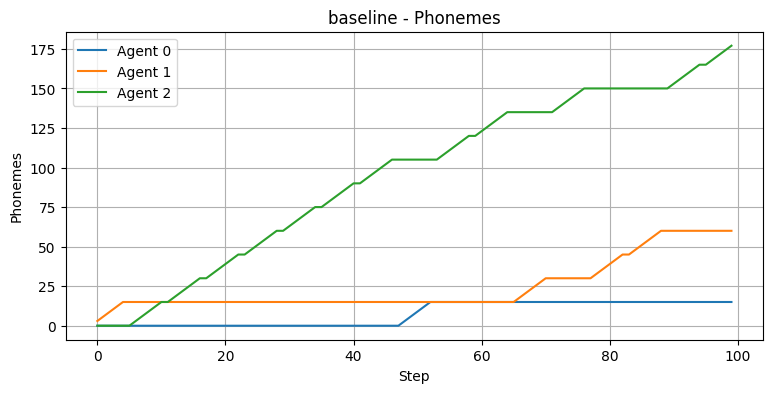

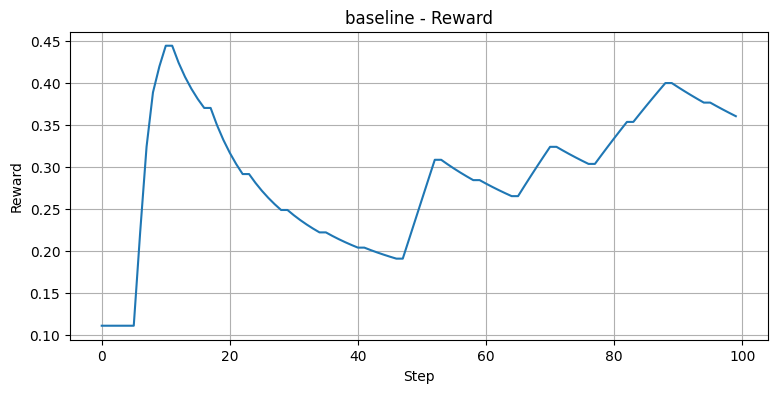

In [16]:
plot_results(p, r, 'baseline')

# First - Same agent diffrent energy

In [17]:
# Create environment
actions = [0]*1000
env_test = GuestEnv(max_steps=len(actions), reward_shaping=False)
user = {  # balanced mediator
        "min_energy_to_speak": 0.55,
        "energy_gain": 0.0,
        "energy_decay": 0.0,
        "max_speaking_time": 10,
        "phonemes_per_step": 5,
    }
env_test.agent_params[0].update(user)
env_test.agent_params[1].update(user)
env_test.agent_params[2].update(user)

env_test.energy = np.array([0.55, 0.55, 0.55])  # Start with enough energy to speak

p, r = run_env(env_test, actions, steps=len(actions))

2026-02-15 01:32:24 | INFO | Initial energy saved from manual assignment: [0.55 0.55 0.55]
2026-02-15 01:32:24 | INFO | Using saved initial energy: [0.55 0.55 0.55]
2026-02-15 01:32:24 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.55, 'energy_gain': 0.0, 'energy_decay': 0.0, 'max_speaking_time': 10, 'phonemes_per_step': 5}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.0, 'energy_decay': 0.0, 'max_speaking_time': 10, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.55, 'energy_gain': 0.0, 'energy_decay': 0.0, 'max_speaking_time': 10, 'phonemes_per_step': 5}}
2026-02-15 01:32:24 | INFO | Environment reset: info={'num_of_step_env': 0, 'phoneme': array([0, 0, 0]), 'actions_stats': array([0, 0, 0, 0, 0, 0, 0]), 'env_reward': 0.0, 'action_number': -1, 'gini_history': [], 'phoneme_history': []}
2026-02-15 01:32:24 | INFO | self.current_speaker=-1 at step 1 with energy 0.5500
2026-02-15 01:32:24 | INFO | Agent 0 energy: 0.5500, threshold: 0.5500
2026-02-15 01:32:24 | INFO 

In [ ]:
env_test.energy

array([0.56, 0.56, 0.45])

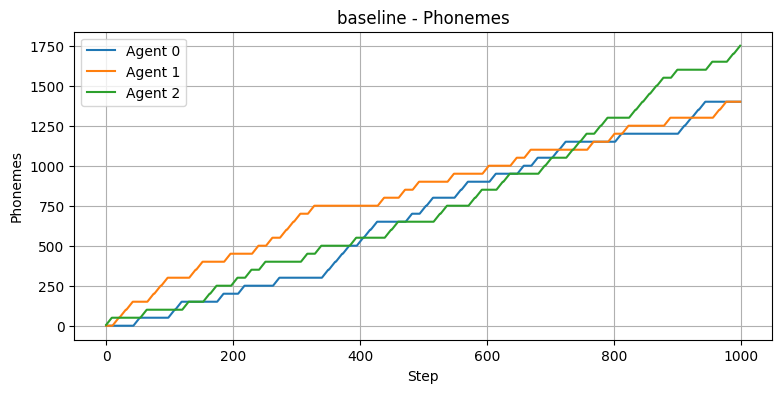

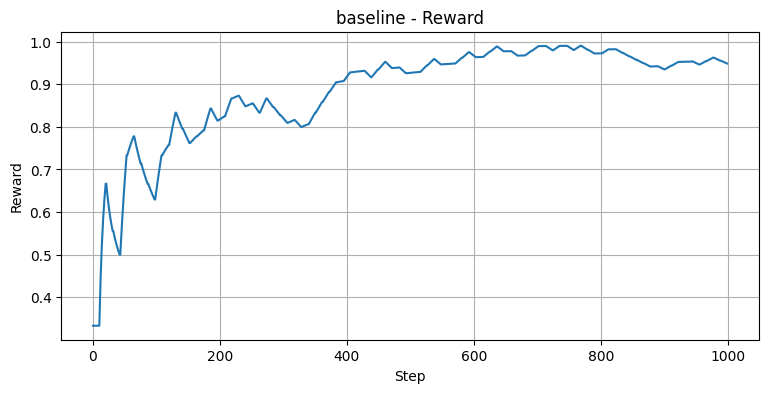

In [18]:
plot_results(p, r, 'baseline')

In [13]:
env_test.reset()

2026-02-15 00:44:31 | INFO | Using saved initial energy: [0.1765 0.346  0.5545]
2026-02-15 00:44:31 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.55, 'energy_gain': 0.001, 'energy_decay': 0.01, 'max_speaking_time': 10, 'phonemes_per_step': 5}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.001, 'energy_decay': 0.01, 'max_speaking_time': 10, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.55, 'energy_gain': 0.001, 'energy_decay': 0.01, 'max_speaking_time': 10, 'phonemes_per_step': 5}}
2026-02-15 00:44:31 | INFO | Environment reset: info={'num_of_step_env': 0, 'phoneme': array([0, 0, 0]), 'actions_stats': array([0, 0, 0, 0, 0, 0, 0]), 'env_reward': 0.0, 'action_number': -1, 'gini_history': [], 'phoneme_history': []}


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333334, 0.33333334, 0.33333334, 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ], dtype=float32),
 {'num_of_step_env': 0,
  'phoneme': array([0, 0, 0]),
  'actions_stats': array([0, 0, 0, 0, 0, 0, 0]),
  'env_reward': 0.0,
  'action_number': -1,
  'gini_history': [],
  'phoneme_history': []})